In [ ]:
from readii.metadata import *

# Debugging matchCTtoSegmentation being empty

In [ ]:
imageFileListPath = "/home/bioinf/bhklab/radiomics/RADCURE_radiomics/rawdata/radiomics/RADCURE/.imgtools/imgtools_RADCURE-0368.csv"

In [ ]:
try:
    segType = getSegmentationType(imageFileListPath)
except RuntimeError as e:
    print(str(e))
    print("Feature extraction not complete")

In [ ]:
fullDicomList = pd.read_csv(imageFileListPath, index_col=0)

In [ ]:
modalities = list(fullDicomList['modality'].unique())

In [ ]:
modalities

# Debugging randomized sampled non-ROI negative control failure

In [41]:
from readii.negative_controls import applyNegativeControl
from readii.loaders import loadSegmentation
from imgtools.io import read_dicom_series
from readii.image_processing import alignImages, getROIVoxelLabel, displayCTSegOverlay, displayImageSlice
import pandas as pd
import os

In [45]:
metadata = pd.read_csv("../results/RADCURE-3458/readii_outputs/ct_to_seg_match_list_RADCURE-3458.csv", header=0)

ctSeriesID = metadata["series_CT"][0]
ctPath = os.path.join("../rawdata/radiomics/RADCURE/", metadata["folder_CT"][0])
rtPath = os.path.join("../rawdata/radiomics/RADCURE/", metadata["file_path_seg"][0])
modality = metadata["modality_seg"][0]

In [46]:
ctImage = read_dicom_series(ctPath, ctSeriesID)

rtStruct = loadSegmentation(rtPath, modality, ctPath, roiNames='GTVp.*')
segImage = rtStruct['GTVp']

labels: {'GTVp': 0}


In [49]:
alignedROIImage = alignImages(ctImage, segImage)
segmentationLabel = getROIVoxelLabel(alignedROIImage)

In [50]:
negativeControlType = 'randomized_sampled'
negativeControlRegion = 'non_roi'

ctImage_nc = applyNegativeControl(ctImage, negativeControlType, negativeControlRegion, alignedROIImage, 10)

In [59]:
from readii.feature_extraction import singleRadiomicFeatureExtraction

singleRadiomicFeatureExtraction(ctImage, segImage, pyradiomicsParamFilePath="pyrad_settings/uhn-radcure-challenge_plus_aerts_params.yaml",
                                negativeControl="randomized_sampled_non_roi", randomSeed=10)

2024-08-28 15:41:37 INFO: Generating randomized_sampled_non_roi negative control for CT. (feature_extraction:singleRadiomicFeatureExtraction:94)
2024-08-28 15:41:40 INFO: Setting up Pyradiomics feature extractor... (feature_extraction:singleRadiomicFeatureExtraction:121)
2024-08-28 15:41:40 INFO: Starting radiomic feature extraction... (feature_extraction:singleRadiomicFeatureExtraction:128)
Feature Compactness1 is deprecated, use with caution!
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to b

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1a3'),
             ('diagnostics_Versions_Numpy', '1.26.4'),
             ('diagnostics_Versions_SimpleITK', '2.4.0'),
             ('diagnostics_Versions_PyWavelet', '1.6.0'),
             ('diagnostics_Versions_Python', '3.9.19'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': [1.0, 1.0, 1.0],
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True,
               'binWidth': 25}),
             ('diagnostics_Configuration_EnabledImageTyp

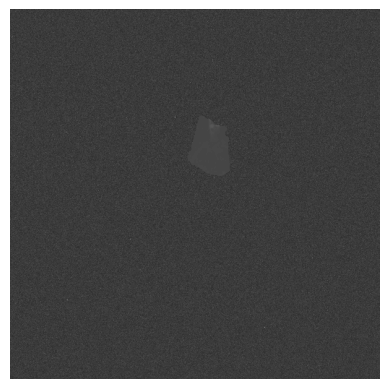

In [57]:
displayImageSlice(ctImage_nc, 140)

In [55]:
import numpy as np 
import SimpleITK as sitk
roiArr = sitk.GetArrayFromImage(alignedROIImage)
np.nonzero(roiArr)

(array([104, 104, 104, ..., 150, 150, 150]),
 array([196, 196, 196, ..., 221, 221, 221]),
 array([284, 285, 286, ..., 272, 273, 274]))